# 4. 변수간 상관관계 분석

In [89]:
data2_new = data2.copy()

#전처리한 변수 추가
data2_new["parking"] = parking.values
data2_new["car_cnt"] = car_cnt.values
data2_new["pop_whole"] = pop_whole.values
data2_new["pop_kid"] = pop_kid.values
data2_new["crswlk"] = crswlk.values
data2_new["trf_lit"] = trf_lit.values
data2_new["trf_cam"] = trf_cam.values
data2_new["trf_sign_p"] = trf_sign_p.values
data2_new["trf_sign_n"] = trf_sign_n.values
data2_new["spd_bmp"] = spd_bmp.values
data2_new["cctv_A"] = cctv_A.values
data2_new["cctv_B"] = cctv_B.values
data2_new["cctv_C"] = cctv_C.values
data2_new["cctv_D"] = cctv_D.values

data2_new["cross1"] = cross1.values
data2_new["cross2"] = cross2.values
data2_new["cross_all"] = cross1.values + cross2.values

data2_new["dist_apt"] = distance_apt
data2_new["dist_aca"] = distance_aca

data2_new.fillna(0, inplace = True)

In [90]:
df_result = data2_new.copy()

for i in trf_jam.columns[1:-1]:
    df_result[i] = trf_jam[i].values

for i in moving_log.columns:
    df_result[i] = moving_log[i].values

df_result.drop(['lat_y', 'lon_y', 'STD_YM_y','index_left_y', 'oneway'], axis =1, inplace = True)

data2_final = df_result.copy()
data2_final.fillna(0,inplace=True)
data2_final["lane"] = data2_final["up_lanes"].values + data2_final["dw_lanes"].values
data2_final["cctv"] = data2_final["cctv_A"].values + data2_final["cctv_C"].values

data2_final.rename(columns={'전체 추정교통량': 'traffic_sum', '승용차 추정교통량': 'traffic_car',
       '버스 추정교통량': 'traffic_bus', '화물차 추정교통량': 'traffic_truck'}, inplace = True)

최종 데이터셋 data2_final 완성

In [91]:
data2_ad = data2_final[data2_final.accident_cnt > -1]

data2_ad_log = data2_ad.copy()
data2_ad_log.iloc[:,3:7] = np.log1p(data2_ad_log.iloc[:,3:7].values) #일부 변수 로그 처리

In [92]:
col = ['accident_cnt', 'parking', 'car_cnt', 'pop_whole',
       'pop_kid', 'crswlk', 'trf_lit', 'trf_cam', 'trf_sign_n',
       'spd_bmp', 'cctv_A', 'cctv_B', 'cctv_C', 'cctv_D', 'cctv', 'cross1', 'cross2', 'cross_all', 
       'dist_apt', 'dist_aca', 'max_speed', 'up_lanes', 'dw_lanes', 'lane', 
       'traffic_sum', 'traffic_car',
       'traffic_bus', 'traffic_truck',
       'TMST_08_x', 'TMST_13_x', 'TMST_16_x', 'TMST_18_x']

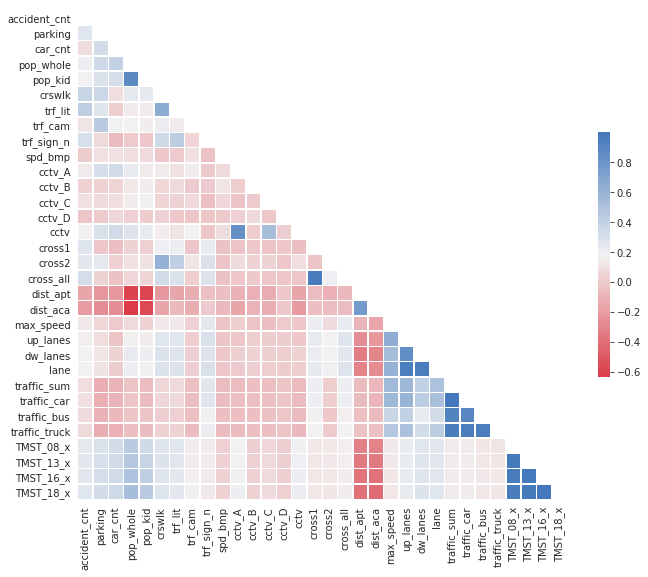

In [93]:
corr = data2_ad_log[col].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'white')

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [94]:
data2_ad_log[col].corr()

,accident_cnt,parking,car_cnt,pop_whole,pop_kid,crswlk,trf_lit,trf_cam,trf_sign_n,spd_bmp,...,dw_lanes,lane,traffic_sum,traffic_car,traffic_bus,traffic_truck,TMST_08_x,TMST_13_x,TMST_16_x,TMST_18_x
accident_cnt,1.000000,0.261812,0.095532,0.209695,0.185027,0.377714,0.424420,0.120816,0.306889,0.010854,...,0.179166,0.178978,0.096405,0.100615,0.083393,0.073766,0.240657,0.254222,0.257712,0.260265
parking,0.261812,1.000000,0.326571,0.347857,0.290702,0.364969,0.264687,0.439338,0.066854,0.103696,...,0.124913,0.112186,-0.117592,-0.116454,-0.101312,-0.119314,0.293463,0.308044,0.311999,0.322574
car_cnt,0.095532,0.326571,1.000000,0.401840,0.309507,0.086168,0.018025,0.186836,-0.057771,0.107727,...,0.044093,0.012310,-0.099075,-0.096870,-0.074104,-0.109152,0.322527,0.331620,0.334083,0.348480
pop_whole,0.209695,0.347857,0.401840,1.000000,0.884944,0.242683,0.151598,0.185909,0.004657,0.091008,...,0.229808,0.207924,-0.023384,-0.020759,-0.017187,-0.037929,0.439431,0.466988,0.496601,0.527956
pop_kid,0.185027,0.290702,0.309507,0.884944,1.000000,0.236685,0.145699,0.155823,-0.009350,0.079871,...,0.205101,0.190319,-0.053262,-0.053187,-0.026058,-0.056504,0.347006,0.381048,0.411833,0.437668
crswlk,0.377714,0.364969,0.086168,0.242683,0.236685,1.000000,0.651104,0.218811,0.345797,-0.009668,...,0.278158,0.279859,0.056067,0.060673,0.022320,0.037993,0.267953,0.277469,0.276591,0.276353
trf_lit,0.424420,0.264687,0.018025,0.151598,0.145699,0.651104,1.000000,0.144768,0.436368,0.003711,...,0.274175,0.277281,0.068022,0.074046,0.031593,0.043814,0.260771,0.256801,0.249821,0.245645
trf_cam,0.120816,0.439338,0.186836,0.185909,0.155823,0.218811,0.144768,1.000000,0.052247,0.100225,...,0.026281,0.022924,-0.043830,-0.041124,-0.043324,-0.054665,0.147308,0.159927,0.164176,0.169735
trf_sign_n,0.306889,0.066854,-0.057771,0.004657,-0.009350,0.345797,0.436368,0.052247,1.000000,-0.034598,...,0.277143,0.297963,0.257195,0.266308,0.170344,0.216837,0.152250,0.154194,0.148595,0.138159
spd_bmp,0.010854,0.103696,0.107727,0.091008,0.079871,-0.009668,0.003711,0.100225,-0.034598,1.000000,...,-0.007418,-0.012448,-0.053970,-0.053033,-0.042204,-0.057010,0.033354,0.034084,0.037028,0.040679


+ 불법 주정차(0.31, 횡단보도(0.40), 신호등(0.45), 교통안전표지판(0.35) 와의 양의 상관관계. 모두 교차로와 연관.
+ CCTV가 많을수록 사건 증가
+ 격자 내의 상주인구는 상관관계 미미.
+ 불법 주정차 변수 또한 격자 내와 격자 주변 모두 고려 필요